# Bank investment example.

In [ ]:
import numpy as np
from scipy.stats import t, ttest_1samp

returns = np.array([10.00, 11.90, 9.90, 10.09, 10.31, 10.34, 9.96,
                    10.30, 10.50, 10.23, 10.72, 11.54, 10.81, 10.15,
                    9.04, 11.55, 10.81, 8.69, 10.74, 10.31, 10.76,
                    10.92, 11.26, 11.21, 10.20, 10.76])

# Calculate mean and standard deviation
mean_returns = np.mean(returns)
sd_returns = np.std(returns)

print("Mean:", mean_returns)
print("Standard Deviation:", sd_returns)

# Calculate t-value
t_value = (mean_returns - 10.22) / (sd_returns / np.sqrt(len(returns)))
print("t-value:", t_value)

# Degrees of freedom
df = len(returns) - 1

# Calculate p-value manually
p_value_manual_greater = 1 - t.cdf(t_value, df=df)
p_value_manual_two_sided = 2 * (1 - t.cdf(np.abs(t_value), df=df))

print("Manually calculated p-value (greater):", p_value_manual_greater)
print("Manually calculated p-value (two-sided):", p_value_manual_two_sided)

Mean: 10.5
Standard Deviation: 0.6998955966098417
t-value: 2.0399120536285715
Manually calculated p-value (greater): 0.026028980947278346
Manually calculated p-value (two-sided): 0.05205796189455669


In [ ]:
# Perform one-sample t-test
t_stat, p_value_greater = ttest_1samp(returns, popmean=10.22, alternative='greater')
t_stat, p_value_two_sided = ttest_1samp(returns, popmean=10.22)

print("One-sample t-test p-value (greater):", p_value_greater)
print("One-sample t-test p-value (two-sided):", p_value_two_sided)

One-sample t-test p-value (greater): 0.0282208818058009
One-sample t-test p-value (two-sided): 0.0564417636116018


   Gender  Arith  Word  Parag  Math  AFQT
0    male     19    27     14    14  70.3
1  female     23    34     11    20  60.4
2    male     30    35     14    25  98.3
3  female     30    35     13    21  84.7
4  female     13    30     11    12  44.5


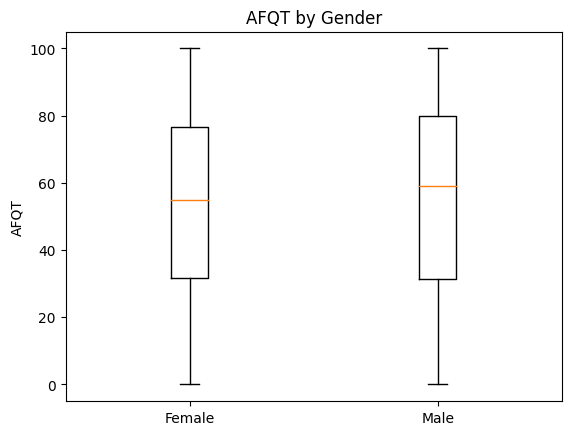

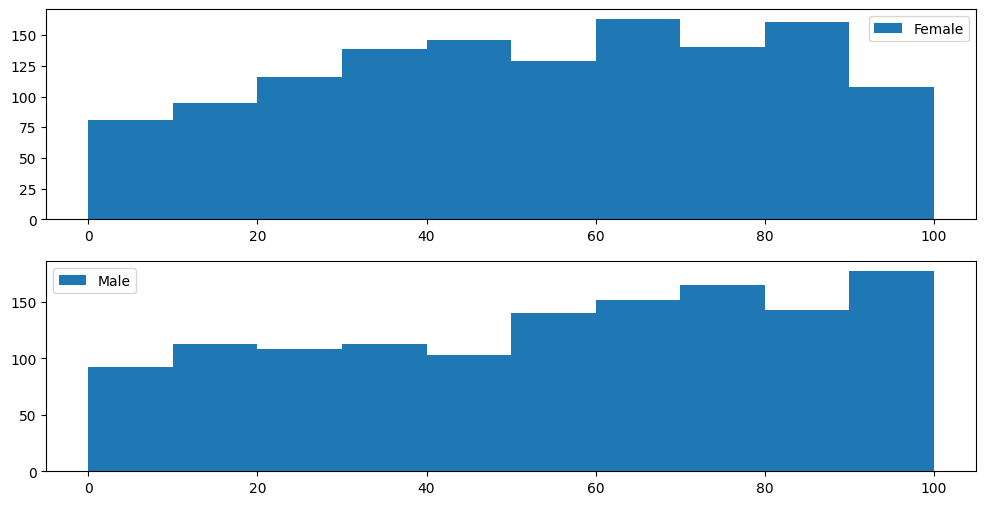

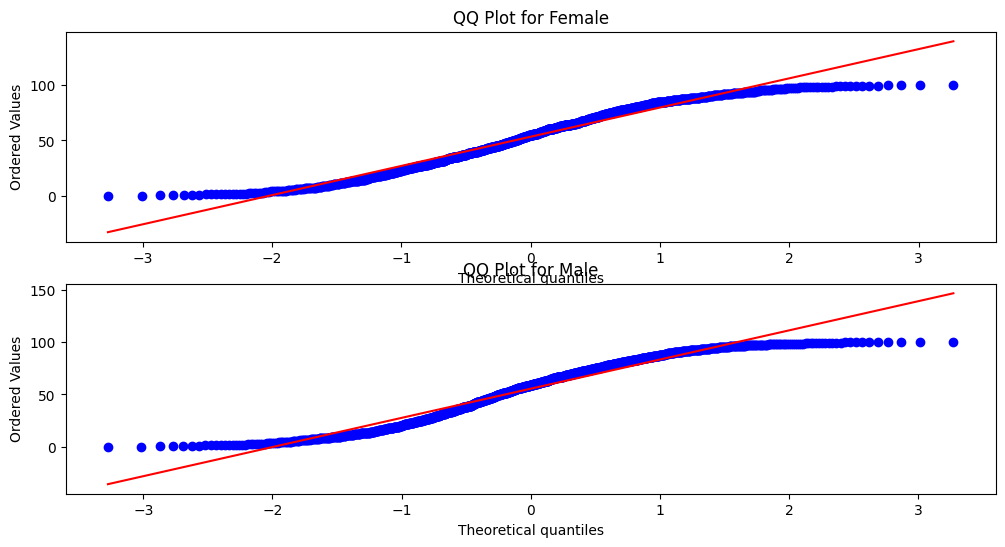

Shapiro-Wilk test p-value for Female: 9.764016789518787e-17
Shapiro-Wilk test p-value for Male: 1.8728506441542807e-20
Sample length for Female: 1278
Sample length for Male: 1306
Levene's test p-value for equal variance: 0.01159367314097326
Two-sample t-test p-value: 0.06157654004350845


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, probplot

path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0222.csv'
ex0222 = pd.read_csv(path)


# Display the first few rows of the data
print(ex0222.head())

# Boxplot
plt.boxplot([ex0222['AFQT'][ex0222['Gender'] == 'female'], ex0222['AFQT'][ex0222['Gender'] == 'male']],
            labels=['Female', 'Male'])
plt.ylabel("AFQT")
plt.title("AFQT by Gender")
plt.show()

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(ex0222['AFQT'][ex0222['Gender'] == 'female'], label='Female')
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(ex0222['AFQT'][ex0222['Gender'] == 'male'], label='Male')
plt.legend()
plt.show()

# QQ plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
probplot(ex0222['AFQT'][ex0222['Gender'] == 'female'], plot=plt)
plt.title("QQ Plot for Female")

plt.subplot(2, 1, 2)
probplot(ex0222['AFQT'][ex0222['Gender'] == 'male'], plot=plt)
plt.title("QQ Plot for Male")

plt.show()

# Shapiro-Wilk test for normality
p_value_shapiro_female = shapiro(ex0222['AFQT'][ex0222['Gender'] == 'female']).pvalue
p_value_shapiro_male = shapiro(ex0222['AFQT'][ex0222['Gender'] == 'male']).pvalue
print("Shapiro-Wilk test p-value for Female:", p_value_shapiro_female)
print("Shapiro-Wilk test p-value for Male:", p_value_shapiro_male)

# Sample lengths
length_female = len(ex0222['AFQT'][ex0222['Gender'] == 'female'])
length_male = len(ex0222['AFQT'][ex0222['Gender'] == 'male'])
print("Sample length for Female:", length_female)
print("Sample length for Male:", length_male)

# Levene's test for equal variance
_, p_value_levene = levene(ex0222['AFQT'][ex0222['Gender'] == 'female'], ex0222['AFQT'][ex0222['Gender'] == 'male'])
print("Levene's test p-value for equal variance:", p_value_levene)

# Two-sample t-test
t_stat, p_value_ttest = ttest_ind(ex0222['AFQT'][ex0222['Gender'] == 'female'], ex0222['AFQT'][ex0222['Gender'] == 'male'], equal_var=False)
print("Two-sample t-test p-value:", p_value_ttest)
